# Sociology: Document Exploration Notebook

This document allows you to explore:

* The top words for any topic in any $K$-topic model trained on sociology dataset
* The top documents of any $K$-topic model trained on the sociology dataset
* A few additional plots summarizing the document $\theta$ values

## Set-up

**Imports**

In [1]:
from gensim.models.ldamodel import LdaModel
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from imp import reload

C:\Users\kcsky\Anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


Scripts and paths

In [2]:
from filepaths import code_path
from filepaths import socio_data_path as data_path
from filepaths import socio_models_path as model_path
from filepaths import socio_models_matrix_path as matrix_path

sys.path.insert(0,code_path)
import LdaOutput
import LdaOutputDocs
import LdaOutputWordPlots
import AbstractCleaner
import LdaOutputGroupPlots

Data

In [3]:
TM_data = pd.read_csv(os.path.join(data_path, "Socio_data_final.csv"))#, index_col = 0)

journals = TM_data["prism:publicationName"].copy() #need this below
year_labels = TM_data.Year

Corpus and dictionary, cleaned abstracts

In [4]:
#sociology
filepath = os.path.join(data_path, "Socio_abstracts4_FreqFilter.pickle")
with open(filepath, "rb") as fp:   #Unpickling
    cleaned_docs = pickle.load(fp)
print(len(AbstractCleaner.extract_vocab(cleaned_docs)), "words in vocab")
print(AbstractCleaner.corpus_length(cleaned_docs), "words in corpus")
corpus, dictionary = AbstractCleaner.get_corpus_and_dictionary(cleaned_docs)

3812 words in vocab
232271 words in corpus


Models

In [5]:
Kvals = [5, 10, 15, 20, 25, 30 ,35, 40, 45]
fnames = ["Best_%d_model"%k for k in Kvals]
model_dict = {}
for i,k in enumerate(Kvals):
    model_dict[k] = LdaModel.load(os.path.join(model_path,fnames[i]))
    

Theta matrices
* each of these has dimension K x D where K is the number of topics and D the number of documents
* the (k,d) entry contains the probability that words in document d come from topic k

In [6]:
Kvals = [5, 10, 15, 20, 25, 30 ,35, 40, 45]
fnames = ["theta_matrix_" + str(k) + ".npy" for k in Kvals]
theta_dict = {}
for i, k in enumerate(Kvals):
    theta_dict[k] = np.load(os.path.join(matrix_path, fnames[i]))

# Top Word Explorer

* examine topic in terms of its top words and size over time

In [7]:
#choose settings
k = 20
topic_id = 12
value_type = "counts" #other option is probabilities
sizetype = "word_count" #other options are "doc_count" and "mean"
lamb = 0.6 #from relevance calculation
topn = 20 #number of top words to show

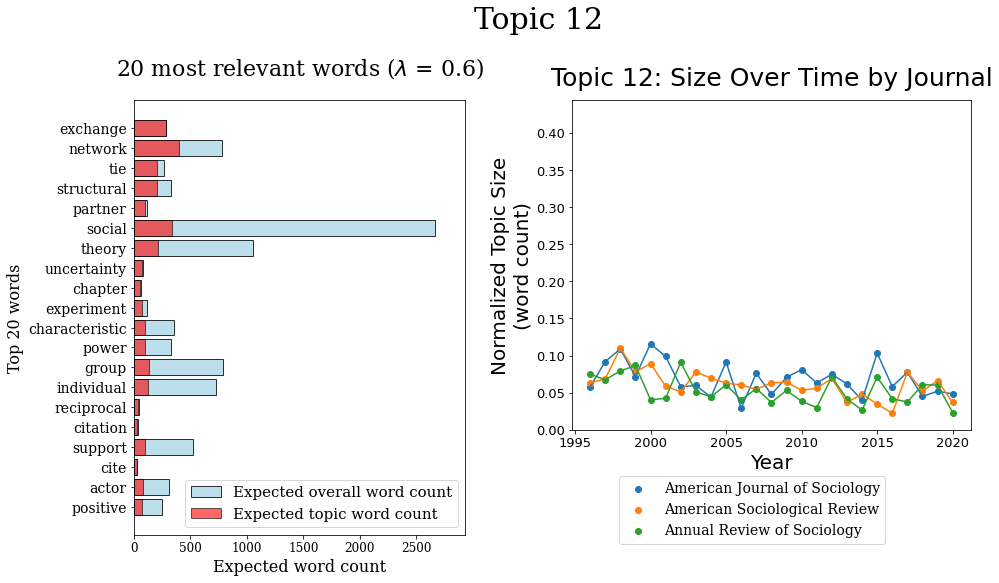

In [8]:
doc_lengths = LdaOutput.get_doc_lengths(corpus)

#use this to take out 2021 for the two journals that have 2021 observations
zoom_dict = {}
for g in np.unique(journals):
    zoom_dict[g] = (0,1)
zoom_dict["Annual Review of Sociology"] = (0,0)

#main plotting
LdaOutputGroupPlots.plot_barplot_and_grouped_timeplot(
    model = model_dict[k],
    topic_id = topic_id,
    corpus = corpus,
    dictionary = dictionary,
    theta_mat = theta_dict[k],
    group_list = journals, 
    year_list = year_labels, 
    doc_lengths = doc_lengths,
    sizetype = sizetype,
    zoom_dict = zoom_dict,
    legend_label = "", 
    title_group_label = "Journal",
    value_type = value_type,
    topn = topn, 
    lamb = lamb, 
    detect_max_val = True, 
    plot_suptitle = True, 
    custom_title = "Topic %d" % topic_id,
    figsize = (15,10),
    save_fig = False)

# Document explorer: overall

First, set key parameters
* k is number of topics
* i is the topic id # (must be in [0,k)
* topd is number of top documents to view
* latex = True means function outputs table as latex formated string
* omit_abstract = True means table does not include article abstracts

In [9]:
k = 20
i = 12
topd = 10
latex = False
omit_abstract = True

Produce output

In [10]:
output = LdaOutputDocs.get_topic_topdoc_table(TM_data,
                                 theta_dict[k], 
                                 topic_id = i,
                                 topd = topd, 
                                 latex = latex, 
                                 omit_abstract = omit_abstract)


View output
* **tip**: for latex, add print(output) to get easier-to-read form

In [11]:
if latex:
    print(output)
output

,Year,Journal,Title,Theta
0,2019,American Sociological Review,"Corrigendum to: Firm Turnover and the Return of Racial Establishment Segregation (American Sociological Review, (2018), 83, 3, (445-474), 10.1177/0003122418767438)",0.91
1,2012,American Sociological Review,Forms of exchange and integrative bonds: Effects of history and embeddedness,0.83
2,2009,American Sociological Review,Resource variation and the development of cohesion in exchange networks,0.82
3,1999,American Sociological Review,Power in negotiated and reciprocal exchange,0.81
4,2000,American Sociological Review,Core networks and tie activation: What kinds of routine networks allocate resources in nonroutine situations?,0.80
5,2007,American Journal of Sociology,Building solidarity through generalized exchange: A theory of reciprocity,0.80
6,2000,American Journal of Sociology,Emotion and group cohesion in productive exchange,0.78
7,1998,American Journal of Sociology,"Physical attractiveness, opportunity, and success in everyday exchange",0.78
8,2008,American Sociological Review,Social exchange and micro social order,0.76
9,2000,American Journal of Sociology,Risk and trust in social exchange: An experimental test of a classical proposition,0.76


# Document explorer: by journal

set parameters

In [12]:
k = 20
i = 12
topd = 10
latex = False
omit_abstract = True

generate tables

In [13]:
output = LdaOutputDocs.get_topic_topdoc_by_journal(df = TM_data,
                                              theta_mat = theta_dict[k],
                                              topic_id = i,
                                              topd = topd, 
                                              latex = latex, 
                                              omit_abstract = omit_abstract)


**American Journal of Sociology**

In [14]:
if latex:
    print(output[0])

output[0]

,Year,Journal,Title,Theta
0,2007,American Journal of Sociology,Building solidarity through generalized exchange: A theory of reciprocity,0.80
1,2000,American Journal of Sociology,Emotion and group cohesion in productive exchange,0.78
2,1998,American Journal of Sociology,"Physical attractiveness, opportunity, and success in everyday exchange",0.78
3,2000,American Journal of Sociology,Risk and trust in social exchange: An experimental test of a classical proposition,0.76
4,2001,American Journal of Sociology,An affect theory of social exchange,0.75
5,2016,American Journal of Sociology,“Relational by natureȍ? Men and women do not differ in physiological response to social stressors faced by token Women,0.68
6,2017,American Journal of Sociology,The structural balance theory of sentiment networks: Elaboration and test,0.66
7,2016,American Journal of Sociology,"Status, faction sizes, and social influence: Testing the theoretical mechanism",0.65
8,2015,American Journal of Sociology,The social origins of networks and diffusion,0.63
9,1998,American Journal of Sociology,"Uncertainty, trust, and commitment formation in the United States and Japan",0.63


**American Sociological Review**

In [15]:
if latex:
    print(output[1])

output[1]

,Year,Journal,Title,Theta
0,2019,American Sociological Review,"Corrigendum to: Firm Turnover and the Return of Racial Establishment Segregation (American Sociological Review, (2018), 83, 3, (445-474), 10.1177/0003122418767438)",0.91
1,2012,American Sociological Review,Forms of exchange and integrative bonds: Effects of history and embeddedness,0.83
2,2009,American Sociological Review,Resource variation and the development of cohesion in exchange networks,0.82
3,1999,American Sociological Review,Power in negotiated and reciprocal exchange,0.81
4,2000,American Sociological Review,Core networks and tie activation: What kinds of routine networks allocate resources in nonroutine situations?,0.80
5,2008,American Sociological Review,Social exchange and micro social order,0.76
6,2003,American Sociological Review,In the eye of the beholder: Procedural justice in social exchange,0.73
7,1996,American Sociological Review,Commitment in exchange relations: Test of a theory of relational cohesion,0.65
8,1997,American Sociological Review,An identity model for network exchange,0.63
9,2012,American Sociological Review,Detecting Communities through Network Data,0.61


**Annual Review of Sociology**

In [16]:
if latex:
    print(output[2])

output[2]

,Year,Journal,Title,Theta
0,2002,Annual Review of Sociology,Integrating models of diffusion of innovations: A conceptual framework,0.54
1,2019,Annual Review of Sociology,"Social Networks and Health: New Developments in Diffusion, Online and Offline",0.49
2,2018,Annual Review of Sociology,Integrating biomarkers in social stratification and health research,0.44
3,2004,Annual Review of Sociology,Social cohesion,0.41
4,2015,Annual Review of Sociology,Effects of the Great Recession: Health and Well-Being,0.41
5,1999,Annual Review of Sociology,The gender system and interaction,0.39
6,2018,Annual Review of Sociology,Stress-related biosocial mechanisms of discrimination and African American Health Inequities,0.36
7,1998,Annual Review of Sociology,"Intermarriage and homogamy: Causes, Patterns, Trends",0.36
8,2013,Annual Review of Sociology,Trends and variation in assortative mating: Causes and consequences,0.35
9,2002,Annual Review of Sociology,The changing face of methodological individualism,0.34


# Distribution of $\theta$ values 

The above only gives the top documents. The plots below visualize the distribution of all document $\theta$ values for a given topic.

In [17]:
k = 20 #choose model
topic_id = 12 #choose topic

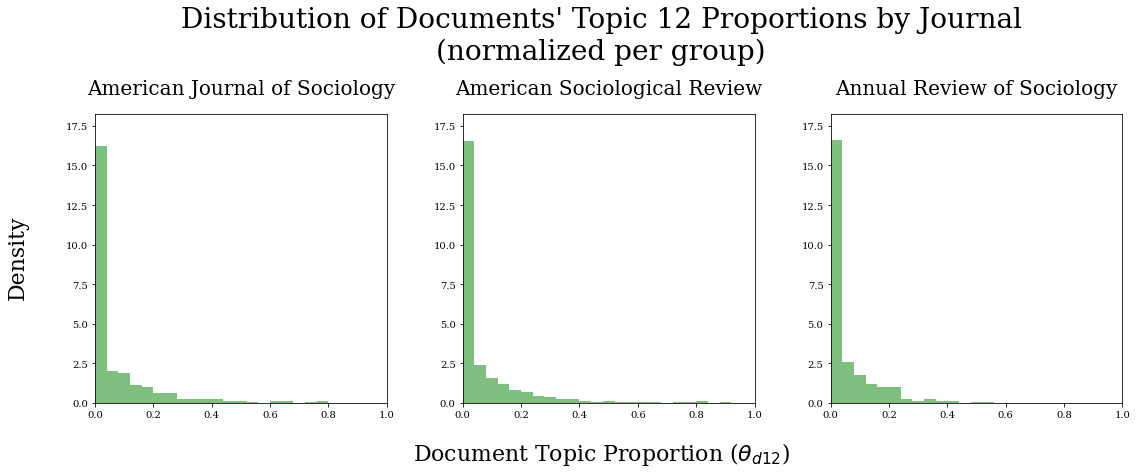

In [18]:
LdaOutputDocs.theta_hist_by_group(theta_dict[k],
                    journals,
                    topic_id = topic_id,
                    normalize = True, #obscures differences due to dif num_obs per journal
                    remove_zeros = False, #change to True to zoom in on non-zero thetas
                    color = "green",
                    alpha = 0.5,
                    bins = 25,
                    group_name = "Journal")


# Document Trajectories

* warning: this can take some time to load

**Explanation:**
* this plot ignores soft clustering and affiliates each document with the topic for which it has the largest $\theta_{dk}$
* plot_all = True is not recommended because the plot is usually incomprehensible (too many document trajectories at once). Instead, you can specify "root_k" and "topic_id" arguments. The function will show trajectories for all documents "affiliated" with topic "topic_id" in the  "root_k"-topic model
* there is no requirement that topics in two different models with the same topic ID # are the same topic (label switching can happen) but topics can be traced by looking at how groups of documents move together. In this way, plot can also help identify topic splitting. For example, if a large number of documents affiliated with topic 4 (say) in model $k$ become affiliated with topic 8 in model $k+5$, then perhaps there has been a label switch and topics 4 and 8 are similar. If many documents from 4 go to 8 but another sizable group go to 10, that might suggest splitting. If there are only a few breakaways of documents from topic 4 to other topic IDs, then this could arise from some noisiness, including where theta values slightly shift to change the relative size rankings of a document's component topics.
* **fact that a document changes affiliation does not mean it no longer draws on its old topic**. This is the drawback of ignoring soft clustering.

In [19]:
#plot will only show trajectories of documents affiliated with topic <topic_id> in the <root_k>-topic model
root_k = 20
topic_id = 7

#warning, if set this to True, plot is usually incomprehensible because plots all 2000+ documents trajectories at once
plot_all = False

#use these to restrict the range of k-values plotted
min_K = None
max_K = None

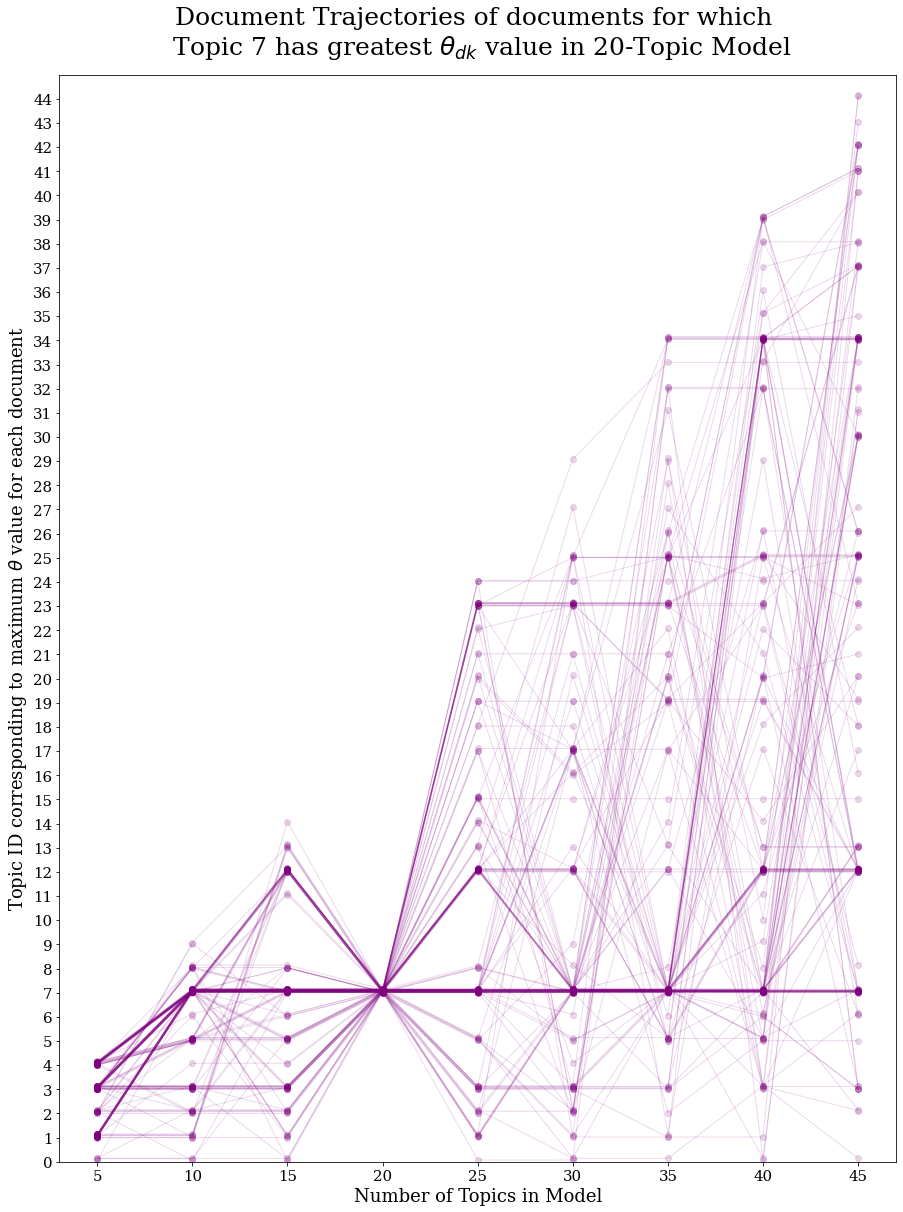

In [20]:
LdaOutputDocs.plot_doc_trajectories(theta_dict = theta_dict,
                      root_k = root_k,
                      topic_id = topic_id,
                      plot_all = False,
                      min_K = min_K,
                      max_K = max_K,
                      single_color = "purple",
                      cmap = "tab20", 
                      figsize = (15,20),
                      shift_width = True)
               

# Number of topics per document

* this function allows you to you examine the distribution of the number of topics with non-zero $\theta$ values per document. Keep in mind that some may be quite small.

In [21]:
k = 30

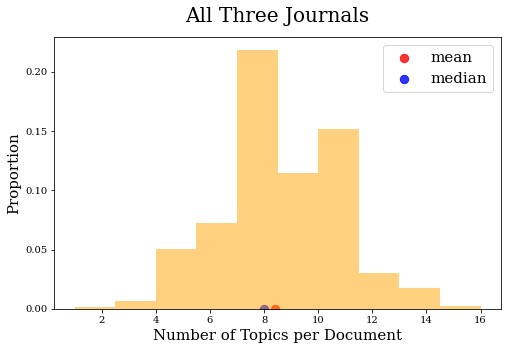

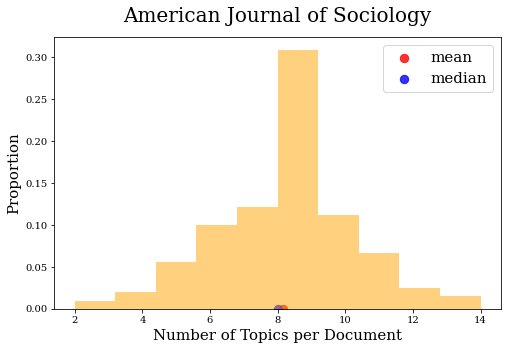

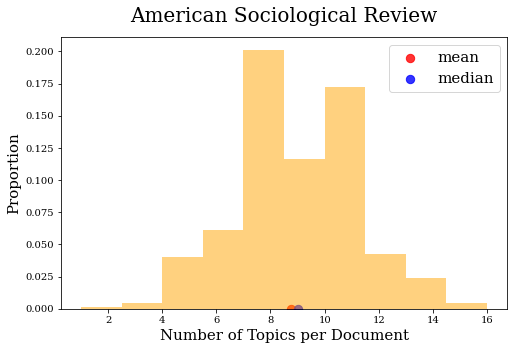

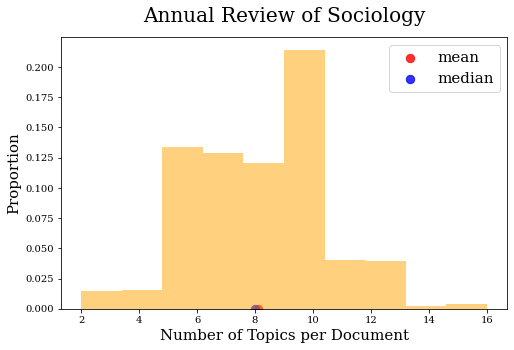

In [22]:
_ = LdaOutputDocs.topics_per_doc_summary(theta_dict[k],
                                     bins = 10,
                                     plot = True, 
                                     custom_title = "All Three Journals")

_ = LdaOutputDocs.topics_per_doc_summary_by_group(theta_dict[k], 
                                                    journals, 
                                                    bins = 10, 
                                                    plot = True)

The plot below shows that the average number of topics per document increases with $k$

Text(0, 0.5, 'Mean number of topics per document')

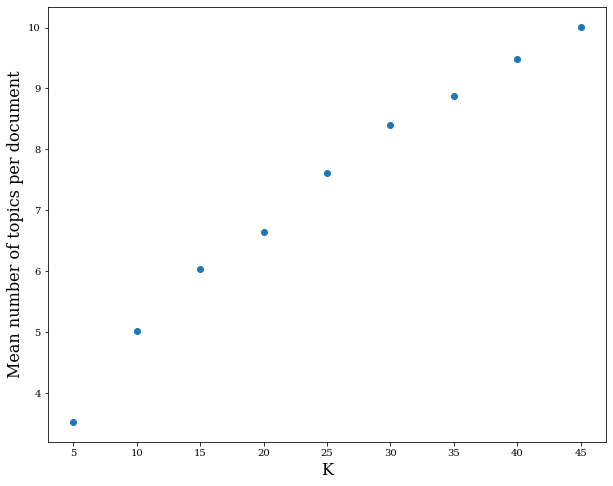

In [23]:
means = [LdaOutputDocs.topics_per_doc_summary(theta_dict[k])["mean"] for k in Kvals]
plt.figure(figsize = (10,8))
plt.scatter(Kvals, means)
plt.xlabel("K", fontsize = 16)
plt.ylabel("Mean number of topics per document", fontsize = 16)